In [27]:
import pandas as pd
clickstream_df = pd.read_csv('datasets/click_stream.csv')
transactions_df = pd.read_csv('datasets/transactions.csv')
customer_df = pd.read_csv('datasets/customer.csv')
products_df = pd.read_csv('datasets/product.csv', on_bad_lines='skip')


In [29]:
clickstream_df['event_name'].value_counts()

event_name
CLICK          2498038
HOMEPAGE       2487126
ADD_TO_CART    1937157
SCROLL         1663571
ITEM_DETAIL    1290396
SEARCH         1173266
BOOKING         852582
PROMO_PAGE      604931
ADD_PROMO       326535
Name: count, dtype: int64

In [30]:
#EDA of Clickstream Data
event_counts = clickstream_df['event_name'].value_counts()
total_events = clickstream_df.shape[0]

# Compute percentages
event_percentages = (event_counts / total_events) * 100

# Convert to DataFrame for better visualization
event_percentage_df = event_percentages.reset_index()
event_percentage_df.columns = ['event_name', 'percentage']

# Display the percentage distribution of all events
event_percentage_df

,event_name,percentage
0,CLICK,19.464824
1,HOMEPAGE,19.379797
2,ADD_TO_CART,15.094414
3,SCROLL,12.962620
4,ITEM_DETAIL,10.054823
5,SEARCH,9.142141
6,BOOKING,6.643357
7,PROMO_PAGE,4.713649
8,ADD_PROMO,2.544375


<Figure size 864x432 with 1 Axes>

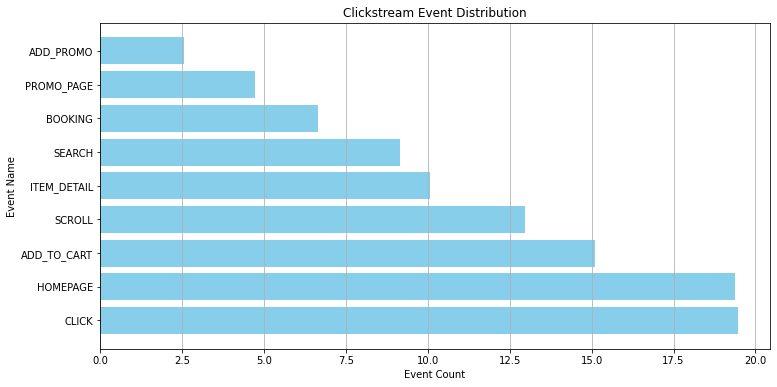

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(event_percentage_df.event_name, event_percentage_df.percentage, color="skyblue")
plt.xlabel("Event Count")
plt.ylabel("Event Name")
plt.title("Clickstream Event Distribution")
plt.grid(axis="x")

In [32]:
clickstream_df['event_time'] = pd.to_datetime(clickstream_df['event_time'])
session_duration = clickstream_df.groupby('session_id')['event_time'].agg(lambda x: (x.max() - x.min()).total_seconds()).reset_index()
session_duration.rename(columns={'event_time': 'session_duration_seconds'}, inplace=True)
session_duration

,session_id,session_duration_seconds
0,00001f29-3ede-4445-95f0-0178934e32ba,2.031120e+05
1,00003eca-954b-4150-aee1-63fc62f395cf,2.335813e+03
2,0000425b-ddc8-4459-a240-6ba814dac132,7.072142e+06
3,00005746-17ec-449c-9c5c-699a3ea9304a,2.560000e+02
4,0000649b-9514-4600-979b-42166a798996,5.219070e+05
...,...,...
895198,ffffce53-1ba7-4d7d-a14a-ffa7079cfbff,3.243190e+05
895199,ffffd3d9-79db-459e-a427-388204a7aac7,5.237100e+04
895200,ffffdf8e-dea1-42bc-9839-7662675c0d38,6.225890e+05
895201,fffff7cf-2a18-4303-9c12-aa836ae3b543,1.699490e+05


In [33]:
filtered_customer_df = customer_df[['customer_id', 'gender', 'username', 'home_country', 'first_join_date']]

In [34]:
#Joining clickstream_df, transactions_df and customer_df
merged_df = clickstream_df.merge(transactions_df, on="session_id", how="inner")
merged_df = merged_df.merge(filtered_customer_df, on="customer_id", how="left")


In [35]:
merged_df.shape


(12463004, 23)

In [9]:
merged_df.columns

Index(['session_id', 'event_name', 'event_time', 'event_id', 'traffic_source',
       'event_metadata', 'created_at', 'customer_id', 'booking_id',
       'product_metadata', 'payment_method', 'payment_status', 'promo_amount',
       'promo_code', 'shipment_fee', 'shipment_date_limit',
       'shipment_location_lat', 'shipment_location_long', 'total_amount',
       'year_month', 'gender', 'username', 'home_country', 'first_join_date'],
      dtype='object')

In [36]:
filtered_merged_df = merged_df[['session_id', 'event_id', 'booking_id', 'customer_id', 'traffic_source', 'event_time', 'created_at', 'first_join_date', 'home_country', 'gender', 'event_name', 'payment_method', 'payment_status', 'promo_amount', 'promo_code', 'shipment_fee', 'shipment_date_limit', 'total_amount']]

In [37]:
filtered_merged_df.head()

,session_id,event_id,booking_id,customer_id,traffic_source,event_time,created_at,first_join_date,home_country,gender,event_name,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,total_amount
0,7d440441-e67a-4d36-b324-80ffd636d166,88aeaeb5-ec98-4859-852c-8abb483faf31,47c126bc-989d-4001-a153-a3fc5685e9b5,18770,MOBILE,2019-09-01 12:05:10.322763+00:00,2019-09-01T12:15:29.425431Z,2019-08-31,Indonesia,F,HOMEPAGE,Gopay,Success,0,NaN,0,2019-09-05T20:40:27.492774Z,1254116
1,7d440441-e67a-4d36-b324-80ffd636d166,934e306e-ecc6-472f-9ccb-12c8536910a2,47c126bc-989d-4001-a153-a3fc5685e9b5,18770,MOBILE,2019-09-01 12:06:33.322763+00:00,2019-09-01T12:15:29.425431Z,2019-08-31,Indonesia,F,ADD_TO_CART,Gopay,Success,0,NaN,0,2019-09-05T20:40:27.492774Z,1254116
2,7d440441-e67a-4d36-b324-80ffd636d166,9f4767a1-40fa-4c9c-9524-dfad18634d56,47c126bc-989d-4001-a153-a3fc5685e9b5,18770,MOBILE,2019-09-01 12:15:29.425431+00:00,2019-09-01T12:15:29.425431Z,2019-08-31,Indonesia,F,BOOKING,Gopay,Success,0,NaN,0,2019-09-05T20:40:27.492774Z,1254116
3,7d440441-e67a-4d36-b324-80ffd636d166,c952142b-4fe9-4694-ad7f-21a5d1bed9ca,47c126bc-989d-4001-a153-a3fc5685e9b5,18770,MOBILE,2019-09-01 12:07:00.322763+00:00,2019-09-01T12:15:29.425431Z,2019-08-31,Indonesia,F,SEARCH,Gopay,Success,0,NaN,0,2019-09-05T20:40:27.492774Z,1254116
4,7d440441-e67a-4d36-b324-80ffd636d166,365b3840-9647-4bf5-917f-f0bec3d05332,47c126bc-989d-4001-a153-a3fc5685e9b5,18770,MOBILE,2019-09-01 12:08:27.322763+00:00,2019-09-01T12:15:29.425431Z,2019-08-31,Indonesia,F,HOMEPAGE,Gopay,Success,0,NaN,0,2019-09-05T20:40:27.492774Z,1254116


In [12]:
#Feature Engineering - Adding Conversion Rate

# Count total events per session
total_events_per_session = filtered_merged_df.groupby('session_id').size().reset_index(name='total_events')

# Count number of 'BOOKING' events per session
booking_events_per_session = filtered_merged_df[filtered_merged_df['event_name'] == 'BOOKING'].groupby('session_id').size().reset_index(name='booking_count')

# Merge both counts
session_conversion = total_events_per_session.merge(booking_events_per_session, on='session_id', how='left')

# Fill NaN values (sessions without bookings) with 0
session_conversion['booking_count'] = session_conversion['booking_count'].fillna(0)

# Compute conversion rate per session
session_conversion['conversion_rate'] = session_conversion['booking_count'] / session_conversion['total_events']


In [13]:
session_conversion

,session_id,total_events,booking_count,conversion_rate
0,00001f29-3ede-4445-95f0-0178934e32ba,8,1,0.125000
1,00003eca-954b-4150-aee1-63fc62f395cf,4,1,0.250000
2,0000425b-ddc8-4459-a240-6ba814dac132,4,1,0.250000
3,00005746-17ec-449c-9c5c-699a3ea9304a,66,1,0.015152
4,0000649b-9514-4600-979b-42166a798996,18,1,0.055556
...,...,...,...,...
852577,ffffce53-1ba7-4d7d-a14a-ffa7079cfbff,19,1,0.052632
852578,ffffd3d9-79db-459e-a427-388204a7aac7,19,1,0.052632
852579,ffffdf8e-dea1-42bc-9839-7662675c0d38,40,1,0.025000
852580,fffff7cf-2a18-4303-9c12-aa836ae3b543,15,1,0.066667


In [14]:
# Merge back with original clickstream_df
filtered_merged_df = filtered_merged_df.merge(session_conversion[['session_id', 'total_events', 'conversion_rate']], on='session_id', how='inner')

filtered_merged_df.head()

,session_id,event_id,booking_id,customer_id,traffic_source,event_time,created_at,first_join_date,home_country,gender,event_name,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,total_amount,total_events,conversion_rate
0,7d440441-e67a-4d36-b324-80ffd636d166,88aeaeb5-ec98-4859-852c-8abb483faf31,47c126bc-989d-4001-a153-a3fc5685e9b5,18770,MOBILE,2019-09-01T12:05:10.322763Z,2019-09-01 12:15:29.425431+00:00,2019-08-31,Indonesia,F,HOMEPAGE,Gopay,Success,0,NaN,0,2019-09-05T20:40:27.492774Z,1254116,9,0.111111
1,7d440441-e67a-4d36-b324-80ffd636d166,934e306e-ecc6-472f-9ccb-12c8536910a2,47c126bc-989d-4001-a153-a3fc5685e9b5,18770,MOBILE,2019-09-01T12:06:33.322763Z,2019-09-01 12:15:29.425431+00:00,2019-08-31,Indonesia,F,ADD_TO_CART,Gopay,Success,0,NaN,0,2019-09-05T20:40:27.492774Z,1254116,9,0.111111
2,7d440441-e67a-4d36-b324-80ffd636d166,9f4767a1-40fa-4c9c-9524-dfad18634d56,47c126bc-989d-4001-a153-a3fc5685e9b5,18770,MOBILE,2019-09-01T12:15:29.425431Z,2019-09-01 12:15:29.425431+00:00,2019-08-31,Indonesia,F,BOOKING,Gopay,Success,0,NaN,0,2019-09-05T20:40:27.492774Z,1254116,9,0.111111
3,7d440441-e67a-4d36-b324-80ffd636d166,c952142b-4fe9-4694-ad7f-21a5d1bed9ca,47c126bc-989d-4001-a153-a3fc5685e9b5,18770,MOBILE,2019-09-01T12:07:00.322763Z,2019-09-01 12:15:29.425431+00:00,2019-08-31,Indonesia,F,SEARCH,Gopay,Success,0,NaN,0,2019-09-05T20:40:27.492774Z,1254116,9,0.111111
4,7d440441-e67a-4d36-b324-80ffd636d166,365b3840-9647-4bf5-917f-f0bec3d05332,47c126bc-989d-4001-a153-a3fc5685e9b5,18770,MOBILE,2019-09-01T12:08:27.322763Z,2019-09-01 12:15:29.425431+00:00,2019-08-31,Indonesia,F,HOMEPAGE,Gopay,Success,0,NaN,0,2019-09-05T20:40:27.492774Z,1254116,9,0.111111


Find common user journeys by analyzing event_name sequences.
Identify events that correlate with conversions (e.g., event_name = 'add_to_cart' → purchase).
Check drop-off points (sessions with add_to_cart but no purchase).
Analyze traffic_source to see if web/mobile behavior differs.

In [15]:
# Calculate total sessions per traffic source
total_sessions_per_source = filtered_merged_df.groupby('traffic_source')['session_id'].nunique().reset_index(name='total_sessions')

# Calculate sessions where a BOOKING occurred
booking_sessions_per_source = filtered_merged_df[filtered_merged_df['event_name'] == 'BOOKING'].groupby('traffic_source')['session_id'].nunique().reset_index(name='booking_sessions')

# Merge and compute conversion rate
traffic_conversion = total_sessions_per_source.merge(booking_sessions_per_source, on='traffic_source', how='left')
traffic_conversion['conversion_rate'] = (traffic_conversion['booking_sessions'] / traffic_conversion['total_sessions']) * 100


traffic_conversion

,traffic_source,total_sessions,booking_sessions,conversion_rate
0,MOBILE,767254,767254,100.0
1,WEB,85328,85328,100.0


In [ ]:
# Extract user journeys per traffic source
user_journeys_by_source = filtered_merged_df.groupby(['traffic_source', 'session_id'])['event_name'].apply(lambda x: ' → '.join(x)).reset_index()

# Count most common journeys per traffic source
common_journeys = user_journeys_by_source.groupby('traffic_source')['event_name'].value_counts().reset_index(name='count')

In [16]:
user_journeys_by_source = filtered_merged_df.groupby(['traffic_source', 'session_id', 'customer_id'])['event_name'].apply(lambda x: ' → '.join(x)).reset_index()

user_journeys_by_source

,traffic_source,session_id,customer_id,event_name
0,MOBILE,00001f29-3ede-4445-95f0-0178934e32ba,74433,HOMEPAGE → ADD_TO_CART → BOOKING → HOMEPAGE → ...
1,MOBILE,00003eca-954b-4150-aee1-63fc62f395cf,43805,HOMEPAGE → ADD_TO_CART → BOOKING → PROMO_PAGE
2,MOBILE,0000425b-ddc8-4459-a240-6ba814dac132,90074,HOMEPAGE → ADD_TO_CART → BOOKING → PROMO_PAGE
3,MOBILE,00005746-17ec-449c-9c5c-699a3ea9304a,25255,HOMEPAGE → ADD_TO_CART → BOOKING → CLICK → SCR...
4,MOBILE,0000649b-9514-4600-979b-42166a798996,16868,HOMEPAGE → ADD_TO_CART → ADD_PROMO → BOOKING →...
...,...,...,...,...
852577,WEB,fffb0e09-d8eb-4167-b533-a6d93db82871,86832,HOMEPAGE → ADD_TO_CART → BOOKING → HOMEPAGE → ...
852578,WEB,fffb5a16-56bb-41ca-aeed-eb480a687251,32294,HOMEPAGE → ADD_TO_CART → BOOKING → CLICK → ADD...
852579,WEB,fffc2601-eb4f-46bf-9b0e-18df9a777c73,75303,HOMEPAGE → ADD_TO_CART → ADD_PROMO → BOOKING →...
852580,WEB,fffea676-ae7b-48f0-9266-db56eaf9755c,18739,HOMEPAGE → ADD_TO_CART → ADD_PROMO → BOOKING →...


In [38]:
user_journeys_by_source

,traffic_source,session_id,customer_id,event_name
0,MOBILE,00001f29-3ede-4445-95f0-0178934e32ba,74433,HOMEPAGE → ADD_TO_CART → BOOKING → HOMEPAGE → ...
1,MOBILE,00003eca-954b-4150-aee1-63fc62f395cf,43805,HOMEPAGE → ADD_TO_CART → BOOKING → PROMO_PAGE
2,MOBILE,0000425b-ddc8-4459-a240-6ba814dac132,90074,HOMEPAGE → ADD_TO_CART → BOOKING → PROMO_PAGE
3,MOBILE,00005746-17ec-449c-9c5c-699a3ea9304a,25255,HOMEPAGE → ADD_TO_CART → BOOKING → CLICK → SCR...
4,MOBILE,0000649b-9514-4600-979b-42166a798996,16868,HOMEPAGE → ADD_TO_CART → ADD_PROMO → BOOKING →...
...,...,...,...,...
852577,WEB,fffb0e09-d8eb-4167-b533-a6d93db82871,86832,HOMEPAGE → ADD_TO_CART → BOOKING → HOMEPAGE → ...
852578,WEB,fffb5a16-56bb-41ca-aeed-eb480a687251,32294,HOMEPAGE → ADD_TO_CART → BOOKING → CLICK → ADD...
852579,WEB,fffc2601-eb4f-46bf-9b0e-18df9a777c73,75303,HOMEPAGE → ADD_TO_CART → ADD_PROMO → BOOKING →...
852580,WEB,fffea676-ae7b-48f0-9266-db56eaf9755c,18739,HOMEPAGE → ADD_TO_CART → ADD_PROMO → BOOKING →...


In [39]:
# Ensure 'event_time' is in datetime format
filtered_merged_df['event_time'] = pd.to_datetime(filtered_merged_df['event_time'])

# Sort by customer and event time
filtered_merged_df = filtered_merged_df.sort_values(by=['customer_id', 'session_id', 'event_time'])

[03/01/25 13:02:54] WARNING  /var/folders/18/g15ktpr90nx5flypw8qg22880000gn/T ]8;id=845923;file:///opt/anaconda3/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=440148;file:///opt/anaconda3/lib/python3.9/warnings.py#109\109]8;;\
                             /ipykernel_70228/1142299973.py:2:                               
                             SettingWithCopyWarning:                                         
                             A value is trying to be set on a copy of a slice                
                             from a DataFrame.                                               
                             Try using .loc[row_indexer,col_indexer] = value                 
                             instead                                                         
                                                                                             
                             See the caveats in the documentation: https://pa                
                             ndas.pydata.org/pandas-docs/stable/user_guide/in                
                             dexing.html#returning-a-view-versus-a-copy                      
                               filtered_merged_df['event_time'] =                            
                             pd.to_datetime(filtered_merged_df['event_time'])                
                                                                                             

In [18]:
# Merge the user journeys sequence back to the original dataframe
merged_df_with_journey = filtered_merged_df.merge(
    user_journeys_by_source, 
    on=['traffic_source', 'session_id', 'customer_id'], 
    how='left'
)



In [19]:
# Rename the new column for clarity
merged_df_with_journey.rename(columns={'event_name_y': 'event_sequence'}, inplace=True)

# Drop duplicate event_name column if necessary
merged_df_with_journey.drop(columns=['event_name_x'], inplace=True)


In [20]:
merged_df_with_journey = merged_df_with_journey.drop_duplicates(subset=['customer_id', 'event_sequence'])

In [21]:
merged_df_with_journey.head()

,session_id,event_id,booking_id,customer_id,traffic_source,event_time,created_at,first_join_date,home_country,gender,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,total_amount,total_events,conversion_rate,event_sequence
0,7d440441-e67a-4d36-b324-80ffd636d166,88aeaeb5-ec98-4859-852c-8abb483faf31,47c126bc-989d-4001-a153-a3fc5685e9b5,18770,MOBILE,2019-09-01T12:05:10.322763Z,2019-09-01 12:15:29.425431+00:00,2019-08-31,Indonesia,F,Gopay,Success,0,NaN,0,2019-09-05T20:40:27.492774Z,1254116,9,0.111111,HOMEPAGE → ADD_TO_CART → BOOKING → SEARCH → HO...
9,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,177faf86-4afe-4214-91f5-dde253b7984d,022def29-0956-483a-b27c-ae69263351ef,18770,MOBILE,2019-09-09T04:49:02.425431Z,2019-09-09 12:17:55.425431+00:00,2019-08-31,Indonesia,F,Gopay,Success,7047,AZ2022,10000,2019-09-13T04:29:14.880300Z,2062833,27,0.037037,HOMEPAGE → ADD_TO_CART → ADD_TO_CART → ADD_TO_...
36,b2843a94-248f-429e-bd54-1a456b4ef4a7,c5cef5d0-f373-460b-8cd7-67122787d743,9c2cf094-76bb-4119-917d-d87d732da8fa,18770,MOBILE,2019-09-15T00:09:43.425431Z,2019-09-17 12:17:58.425431+00:00,2019-08-31,Indonesia,F,Gopay,Success,0,NaN,25000,2019-09-18T17:31:29.729123Z,521501,4,0.250000,HOMEPAGE → ADD_TO_CART → BOOKING → SCROLL
40,d9aaa8a8-5e60-4e1e-ab0a-bb9755a7a3e9,ab929a73-3c47-4870-a7e9-74a69a1c9688,32766f80-e889-4483-84f6-4da69e8fd8a8,18770,WEB,2019-09-23T20:17:49.425431Z,2019-09-25 12:30:19.425431+00:00,2019-08-31,Indonesia,F,Credit Card,Success,4903,BUYMORE,10000,2019-09-30T15:01:37.146539Z,1506117,9,0.111111,HOMEPAGE → ADD_TO_CART → ADD_TO_CART → ADD_TO_...
49,98e66f53-f24f-4238-8c9c-34a0482e22d5,f0afb1f7-2938-49d8-af80-fd80351927bb,d2d99246-0eee-4d10-a902-7ef1b07d9c1f,18770,MOBILE,2019-10-02T11:23:23.425431Z,2019-10-03 12:34:39.425431+00:00,2019-08-31,Indonesia,F,Credit Card,Success,6307,AZ2022,10000,2019-10-08T06:14:02.438589Z,265140,14,0.071429,HOMEPAGE → ADD_TO_CART → ADD_PROMO → BOOKING →...


In [22]:
merged_df_with_journey.to_csv("merged_df_with_journey.csv")

In [41]:
common_journeys = user_journeys_by_source.groupby('traffic_source')['event_name'].value_counts().reset_index(name='count')
display(common_journeys)

,traffic_source,event_name,count
0,MOBILE,HOMEPAGE → ADD_TO_CART → BOOKING → CLICK,19765
1,MOBILE,HOMEPAGE → ADD_TO_CART → BOOKING → SCROLL,12011
2,MOBILE,HOMEPAGE → ADD_TO_CART → BOOKING → ITEM_DETAIL,11160
3,MOBILE,HOMEPAGE → ADD_TO_CART → BOOKING → ADD_TO_CART,9190
4,MOBILE,HOMEPAGE → ADD_TO_CART → BOOKING → SEARCH,8705
...,...,...,...
515370,WEB,HOMEPAGE → ADD_TO_CART → BOOKING → SEARCH → SE...,1
515371,WEB,HOMEPAGE → ADD_TO_CART → BOOKING → SEARCH → SE...,1
515372,WEB,HOMEPAGE → ADD_TO_CART → BOOKING → SEARCH → SE...,1
515373,WEB,HOMEPAGE → ADD_TO_CART → BOOKING → SEARCH → SE...,1


In [43]:
total_journeys = common_journeys['count'].sum()

common_journeys['percentage'] = (common_journeys['count'] / total_journeys) * 100

common_journeys['percentage'] = common_journeys['percentage'].round(2)
common_journeys

,traffic_source,event_name,count,percentage
0,MOBILE,HOMEPAGE → ADD_TO_CART → BOOKING → CLICK,19765,2.32
1,MOBILE,HOMEPAGE → ADD_TO_CART → BOOKING → SCROLL,12011,1.41
2,MOBILE,HOMEPAGE → ADD_TO_CART → BOOKING → ITEM_DETAIL,11160,1.31
3,MOBILE,HOMEPAGE → ADD_TO_CART → BOOKING → ADD_TO_CART,9190,1.08
4,MOBILE,HOMEPAGE → ADD_TO_CART → BOOKING → SEARCH,8705,1.02
...,...,...,...,...
515370,WEB,HOMEPAGE → ADD_TO_CART → BOOKING → SEARCH → SE...,1,0.00
515371,WEB,HOMEPAGE → ADD_TO_CART → BOOKING → SEARCH → SE...,1,0.00
515372,WEB,HOMEPAGE → ADD_TO_CART → BOOKING → SEARCH → SE...,1,0.00
515373,WEB,HOMEPAGE → ADD_TO_CART → BOOKING → SEARCH → SE...,1,0.00


In [ ]:
#Total Clickstream Data Sessions 
add_to_cart_sessions = set(clickstream_df[clickstream_df['event_name'] == 'ADD_TO_CART']['session_id'])

# Sessions where BOOKING occurs
booking_sessions = set(clickstream_df[clickstream_df['event_name'] == 'BOOKING']['session_id'])

# Debugging step - Print sample session IDs
print("Total ADD_TO_CART Sessions:", len(add_to_cart_sessions))
print("Total BOOKING Sessions:", len(booking_sessions))

# Compute drop-off sessions
dropoff_sessions = add_to_cart_sessions - booking_sessions
print("Total Drop-Off Sessions:", len(dropoff_sessions))

Total ADD_TO_CART Sessions: 872061
Total BOOKING Sessions: 852582
Total Drop-Off Sessions: 19479


In [78]:
import pandas as pd

# Sample dataset (use your clickstream_df)
grouped_df = filtered_merged_df.groupby('customer_id').agg({
    'session_id': 'nunique',  # Number of unique sessions per customer
    'booking_id': 'nunique',  # Number of bookings per customer
    'event_name': 'count',  # Total number of events per customer
    'total_amount': 'sum',  # Total revenue per customer
    'promo_amount': 'sum',  # Total discounts used per customer
    'shipment_fee': 'sum',  # Total shipment fees paid
    'payment_method': lambda x: x.mode()[0],  # Most used payment method
    'traffic_source': lambda x: x.mode()[0],  # Most common traffic source
    'conversion_rate': 'mean'  # Average conversion rate per customer
}).reset_index()

grouped_df

,customer_id,session_id,booking_id,event_name,total_amount,promo_amount,shipment_fee,payment_method,traffic_source,conversion_rate
0,3,51,51,682,299044279,2321738,5325000,Credit Card,MOBILE,0.074780
1,8,7,7,202,63812004,69291,1725000,Credit Card,MOBILE,0.034653
2,9,6,6,59,33507505,0,385000,Gopay,MOBILE,0.101695
3,11,1,1,14,2765462,132888,210000,OVO,MOBILE,0.071429
4,15,5,5,57,23704990,171594,570000,Credit Card,MOBILE,0.087719
...,...,...,...,...,...,...,...,...,...,...
50699,99992,12,12,92,46664557,147214,850000,OVO,MOBILE,0.130435
50700,99995,60,60,1002,491782503,705823,8695000,Credit Card,MOBILE,0.059880
50701,99997,1,1,10,2264610,0,100000,Gopay,MOBILE,0.100000
50702,99998,8,8,354,236369831,1760749,3010000,Credit Card,MOBILE,0.022599


In [109]:
import pandas as pd
merged_df_with_journey = pd.read_csv('merged_df_with_journey.csv')
merged_df_with_journey.drop(columns=['Unnamed: 0'], inplace=True)

merged_df_with_journey.head()

,session_id,event_id,booking_id,customer_id,traffic_source,event_time,created_at,first_join_date,home_country,gender,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,total_amount,total_events,conversion_rate,event_sequence
0,7d440441-e67a-4d36-b324-80ffd636d166,88aeaeb5-ec98-4859-852c-8abb483faf31,47c126bc-989d-4001-a153-a3fc5685e9b5,18770,MOBILE,2019-09-01T12:05:10.322763Z,2019-09-01 12:15:29.425431+00:00,2019-08-31,Indonesia,F,Gopay,Success,0,NaN,0,2019-09-05T20:40:27.492774Z,1254116,9,0.111111,HOMEPAGE → ADD_TO_CART → BOOKING → SEARCH → HO...
1,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,177faf86-4afe-4214-91f5-dde253b7984d,022def29-0956-483a-b27c-ae69263351ef,18770,MOBILE,2019-09-09T04:49:02.425431Z,2019-09-09 12:17:55.425431+00:00,2019-08-31,Indonesia,F,Gopay,Success,7047,AZ2022,10000,2019-09-13T04:29:14.880300Z,2062833,27,0.037037,HOMEPAGE → ADD_TO_CART → ADD_TO_CART → ADD_TO_...
2,b2843a94-248f-429e-bd54-1a456b4ef4a7,c5cef5d0-f373-460b-8cd7-67122787d743,9c2cf094-76bb-4119-917d-d87d732da8fa,18770,MOBILE,2019-09-15T00:09:43.425431Z,2019-09-17 12:17:58.425431+00:00,2019-08-31,Indonesia,F,Gopay,Success,0,NaN,25000,2019-09-18T17:31:29.729123Z,521501,4,0.250000,HOMEPAGE → ADD_TO_CART → BOOKING → SCROLL
3,d9aaa8a8-5e60-4e1e-ab0a-bb9755a7a3e9,ab929a73-3c47-4870-a7e9-74a69a1c9688,32766f80-e889-4483-84f6-4da69e8fd8a8,18770,WEB,2019-09-23T20:17:49.425431Z,2019-09-25 12:30:19.425431+00:00,2019-08-31,Indonesia,F,Credit Card,Success,4903,BUYMORE,10000,2019-09-30T15:01:37.146539Z,1506117,9,0.111111,HOMEPAGE → ADD_TO_CART → ADD_TO_CART → ADD_TO_...
4,98e66f53-f24f-4238-8c9c-34a0482e22d5,f0afb1f7-2938-49d8-af80-fd80351927bb,d2d99246-0eee-4d10-a902-7ef1b07d9c1f,18770,MOBILE,2019-10-02T11:23:23.425431Z,2019-10-03 12:34:39.425431+00:00,2019-08-31,Indonesia,F,Credit Card,Success,6307,AZ2022,10000,2019-10-08T06:14:02.438589Z,265140,14,0.071429,HOMEPAGE → ADD_TO_CART → ADD_PROMO → BOOKING →...


In [3]:
num_cols = merged_df_with_journey.select_dtypes(include=['number']).columns.tolist()
cat_cols = merged_df_with_journey.select_dtypes(include=['object', 'category']).columns.tolist()
datetime_cols = merged_df_with_journey.select_dtypes(include=['datetime']).columns.tolist()
cat_cols = list(set(cat_cols) - set(datetime_cols))

In [4]:
merged_df_with_journey[num_cols] = merged_df_with_journey[num_cols].fillna(0)
merged_df_with_journey[cat_cols] = merged_df_with_journey[cat_cols].fillna("Unknown")

<Figure size 1440x1152 with 2 Axes>

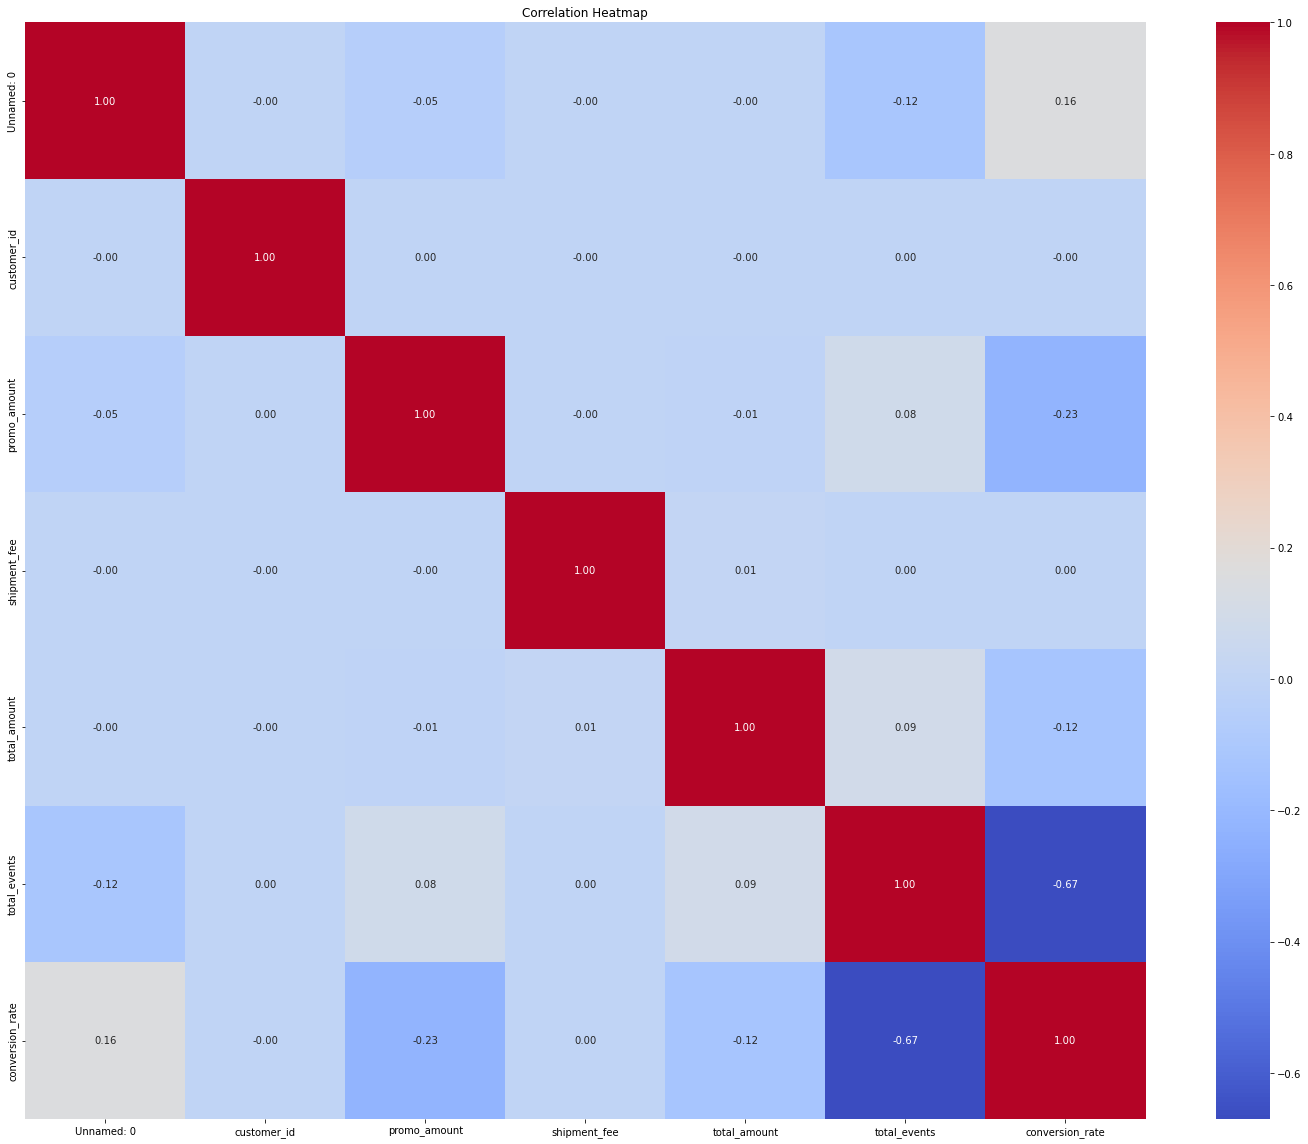

Maximum pairwise correlation: 0.16


<Figure size 432x288 with 0 Axes>

In [5]:
#Target Variable - conversion rate
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

# Assuming df is your DataFrame
correlation_matrix = merged_df_with_journey[num_cols].corr()

# Create the heatmap
plt.figure(figsize=(20, 16))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set title
plt.title('Correlation Heatmap')

# Show the plot
plt.tight_layout()
plt.show()

# Find the max correlation
upper_triangular = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
max_correlation = upper_triangular.max().max()
print(f"Maximum pairwise correlation: {max_correlation:.2f}")
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')

In [7]:
# categorical_vals_df = merged_df_with_journey.copy()
merged_df_with_journey[cat_cols] = merged_df_with_journey[cat_cols].fillna("Unknown")

In [9]:
merged_df_with_journey[cat_cols] 

,payment_status,booking_id,session_id,gender,traffic_source,event_time,created_at,event_id,first_join_date,home_country,payment_method,promo_code,event_sequence,shipment_date_limit
0,Success,47c126bc-989d-4001-a153-a3fc5685e9b5,7d440441-e67a-4d36-b324-80ffd636d166,F,MOBILE,2019-09-01T12:05:10.322763Z,2019-09-01 12:15:29.425431+00:00,88aeaeb5-ec98-4859-852c-8abb483faf31,2019-08-31,Indonesia,Gopay,Unknown,HOMEPAGE → ADD_TO_CART → BOOKING → SEARCH → HO...,2019-09-05T20:40:27.492774Z
1,Success,022def29-0956-483a-b27c-ae69263351ef,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,F,MOBILE,2019-09-09T04:49:02.425431Z,2019-09-09 12:17:55.425431+00:00,177faf86-4afe-4214-91f5-dde253b7984d,2019-08-31,Indonesia,Gopay,AZ2022,HOMEPAGE → ADD_TO_CART → ADD_TO_CART → ADD_TO_...,2019-09-13T04:29:14.880300Z
2,Success,9c2cf094-76bb-4119-917d-d87d732da8fa,b2843a94-248f-429e-bd54-1a456b4ef4a7,F,MOBILE,2019-09-15T00:09:43.425431Z,2019-09-17 12:17:58.425431+00:00,c5cef5d0-f373-460b-8cd7-67122787d743,2019-08-31,Indonesia,Gopay,Unknown,HOMEPAGE → ADD_TO_CART → BOOKING → SCROLL,2019-09-18T17:31:29.729123Z
3,Success,32766f80-e889-4483-84f6-4da69e8fd8a8,d9aaa8a8-5e60-4e1e-ab0a-bb9755a7a3e9,F,WEB,2019-09-23T20:17:49.425431Z,2019-09-25 12:30:19.425431+00:00,ab929a73-3c47-4870-a7e9-74a69a1c9688,2019-08-31,Indonesia,Credit Card,BUYMORE,HOMEPAGE → ADD_TO_CART → ADD_TO_CART → ADD_TO_...,2019-09-30T15:01:37.146539Z
4,Success,d2d99246-0eee-4d10-a902-7ef1b07d9c1f,98e66f53-f24f-4238-8c9c-34a0482e22d5,F,MOBILE,2019-10-02T11:23:23.425431Z,2019-10-03 12:34:39.425431+00:00,f0afb1f7-2938-49d8-af80-fd80351927bb,2019-08-31,Indonesia,Credit Card,AZ2022,HOMEPAGE → ADD_TO_CART → ADD_PROMO → BOOKING →...,2019-10-08T06:14:02.438589Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821842,Success,986fcb6b-d0ce-4b74-8818-dab4c33866f5,f38416ce-51f2-46b0-a476-776d8fed1cb0,F,WEB,2021-08-01T07:47:06.737783Z,2021-08-01 08:36:19.259139+00:00,7201b838-9d41-429c-a5f7-da4b9b64ca6e,2021-08-01,Indonesia,OVO,Unknown,HOMEPAGE → ADD_TO_CART → BOOKING → SEARCH,2021-08-02T14:21:25.130782Z
821843,Success,52c3fdbe-3d6d-4044-a609-2ea7d7e3e036,c1ce86f6-858b-4009-af5b-f1483a28d020,M,WEB,2020-09-22T22:30:52.674560Z,2020-09-22 23:15:15.843895+00:00,74ae05ad-1c63-493f-88d3-cd225cb5ceb5,2020-09-20,Indonesia,Credit Card,Unknown,HOMEPAGE → ADD_TO_CART → BOOKING → SEARCH,2020-09-24T21:05:25.197511Z
821844,Success,a3024507-444d-4925-a0a2-e2991d7c789c,f5c4bbe0-f977-45bb-af23-6ab524df7777,F,MOBILE,2022-04-09T20:52:23.132472Z,2022-04-09 21:19:08.619449+00:00,8eef30df-e285-4541-9d07-d628b408ac8a,2022-04-09,Indonesia,Debit Card,Unknown,HOMEPAGE → ADD_TO_CART → BOOKING → SEARCH,2022-04-14T15:57:21.824425Z
821845,Success,c7031615-9636-4ce8-a145-1568cbf4ce79,ad1063b0-a6e5-40a9-aed6-d1b45741e571,M,MOBILE,2021-06-07T04:31:33.354381Z,2021-06-07 04:50:54.096245+00:00,0a71bea6-41d5-41fd-9254-f59d21239f0b,2021-06-06,Indonesia,Debit Card,Unknown,HOMEPAGE → ADD_TO_CART → BOOKING → SEARCH,2021-06-12T10:42:13.447583Z


In [38]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
columns_to_encode = ['gender', 'traffic_source', 'home_country', 'payment_method', 'promo_code']

# Initialize Label Encoder
label_encoder = LabelEncoder()
categorical_vals_df = pd.DataFrame()
# Apply Label Encoding
for col in columns_to_encode:
    categorical_vals_df[col] = label_encoder.fit_transform(merged_df_with_journey[col])


In [39]:
categorical_vals_df

,gender,traffic_source,home_country,payment_method,promo_code
0,0,0,0,2,5
1,0,0,0,2,0
2,0,0,0,2,5
3,0,1,0,0,1
4,0,0,0,0,0
...,...,...,...,...,...
821842,0,1,0,4,5
821843,1,1,0,0,5
821844,0,0,0,1,5
821845,1,0,0,1,5


In [ ]:
categorical_vals_df['conversion_rate'] = merged_df_with_journey['conversion_rate']


In [48]:
categorical_vals_df['total_amount'] = merged_df_with_journey['total_amount']


In [43]:

# Compute correlation
correlation_matrix = categorical_vals_df.corr()
target_corr = correlation_matrix["conversion_rate"].sort_values(ascending=False)
print(target_corr)


conversion_rate    1.000000
promo_code         0.101027
traffic_source     0.000519
gender            -0.000815
payment_method    -0.001904
home_country            NaN
Name: conversion_rate, dtype: float64


<Figure size 720x360 with 1 Axes>

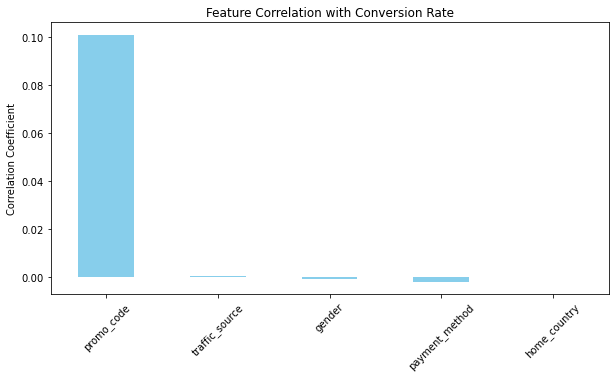

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
target_corr.drop("conversion_rate").plot(kind='bar', color="skyblue")
plt.title("Feature Correlation with Conversion Rate")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.show()

In [63]:
# Convert timestamp columns to datetime format
time_columns = ['event_time', 'created_at', 'shipment_date_limit', 'first_join_date']
date_col_encoded_df = pd.DataFrame()

merged_df_with_journey['created_at'] = pd.to_datetime(merged_df_with_journey['created_at'], utc=True)
merged_df_with_journey['event_time'] = pd.to_datetime(merged_df_with_journey['event_time'], utc=True)
merged_df_with_journey['shipment_date_limit'] = pd.to_datetime(merged_df_with_journey['shipment_date_limit'], utc=True)
merged_df_with_journey['first_join_date'] = pd.to_datetime(merged_df_with_journey['first_join_date']).dt.tz_localize('UTC')

# Extract useful time-based features
date_col_encoded_df['year'] = merged_df_with_journey['created_at'].dt.year
date_col_encoded_df['month'] = merged_df_with_journey['created_at'].dt.month
date_col_encoded_df['day'] = merged_df_with_journey['created_at'].dt.day
date_col_encoded_df['hour'] = merged_df_with_journey['created_at'].dt.hour
date_col_encoded_df['day_of_week'] = merged_df_with_journey['created_at'].dt.dayofweek

# Compute days since first interaction (e.g., customer loyalty metric)
date_col_encoded_df['days_since_first_join'] = (merged_df_with_journey['created_at'] - merged_df_with_journey['first_join_date']).dt.days


In [64]:
date_col_encoded_df


,year,month,day,hour,day_of_week,days_since_first_join
0,2019,9,1,12,6,1
1,2019,9,9,12,0,9
2,2019,9,17,12,1,17
3,2019,9,25,12,2,25
4,2019,10,3,12,3,33
...,...,...,...,...,...,...
821842,2021,8,1,8,6,0
821843,2020,9,22,23,1,2
821844,2022,4,9,21,5,0
821845,2021,6,7,4,0,1


In [68]:
#Another Feature to Add for Feature Engineering
merged_df_with_journey['is_weekend'] = merged_df_with_journey['created_at'].dt.weekday >= 5

#Convert continuous time values into meaningful categories (e.g., Morning, Afternoon, Evening).

merged_df_with_journey['time_of_day'] = pd.cut(
    date_col_encoded_df['hour'], bins=[0, 6, 12, 18, 24], 
    labels=['Night', 'Morning', 'Afternoon', 'Evening'], include_lowest=True
)

#Seasonality Effects (For Demand Analysis)
merged_df_with_journey['is_holiday_season'] = date_col_encoded_df['month'].apply(lambda x: 1 if x in [11, 12] else 0)

merged_df_with_journey.head()

,Unnamed: 0,session_id,event_id,booking_id,customer_id,traffic_source,event_time,created_at,first_join_date,home_country,...,promo_code,shipment_fee,shipment_date_limit,total_amount,total_events,conversion_rate,event_sequence,is_weekend,time_of_day,is_holiday_season
0,0,7d440441-e67a-4d36-b324-80ffd636d166,88aeaeb5-ec98-4859-852c-8abb483faf31,47c126bc-989d-4001-a153-a3fc5685e9b5,18770,MOBILE,2019-09-01 12:05:10.322763+00:00,2019-09-01 12:15:29.425431+00:00,2019-08-31 00:00:00+00:00,Indonesia,...,NaN,0,2019-09-05 20:40:27.492774+00:00,1254116,9,0.111111,HOMEPAGE → ADD_TO_CART → BOOKING → SEARCH → HO...,True,Morning,0
1,9,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,177faf86-4afe-4214-91f5-dde253b7984d,022def29-0956-483a-b27c-ae69263351ef,18770,MOBILE,2019-09-09 04:49:02.425431+00:00,2019-09-09 12:17:55.425431+00:00,2019-08-31 00:00:00+00:00,Indonesia,...,AZ2022,10000,2019-09-13 04:29:14.880300+00:00,2062833,27,0.037037,HOMEPAGE → ADD_TO_CART → ADD_TO_CART → ADD_TO_...,False,Morning,0
2,36,b2843a94-248f-429e-bd54-1a456b4ef4a7,c5cef5d0-f373-460b-8cd7-67122787d743,9c2cf094-76bb-4119-917d-d87d732da8fa,18770,MOBILE,2019-09-15 00:09:43.425431+00:00,2019-09-17 12:17:58.425431+00:00,2019-08-31 00:00:00+00:00,Indonesia,...,NaN,25000,2019-09-18 17:31:29.729123+00:00,521501,4,0.250000,HOMEPAGE → ADD_TO_CART → BOOKING → SCROLL,False,Morning,0
3,40,d9aaa8a8-5e60-4e1e-ab0a-bb9755a7a3e9,ab929a73-3c47-4870-a7e9-74a69a1c9688,32766f80-e889-4483-84f6-4da69e8fd8a8,18770,WEB,2019-09-23 20:17:49.425431+00:00,2019-09-25 12:30:19.425431+00:00,2019-08-31 00:00:00+00:00,Indonesia,...,BUYMORE,10000,2019-09-30 15:01:37.146539+00:00,1506117,9,0.111111,HOMEPAGE → ADD_TO_CART → ADD_TO_CART → ADD_TO_...,False,Morning,0
4,49,98e66f53-f24f-4238-8c9c-34a0482e22d5,f0afb1f7-2938-49d8-af80-fd80351927bb,d2d99246-0eee-4d10-a902-7ef1b07d9c1f,18770,MOBILE,2019-10-02 11:23:23.425431+00:00,2019-10-03 12:34:39.425431+00:00,2019-08-31 00:00:00+00:00,Indonesia,...,AZ2022,10000,2019-10-08 06:14:02.438589+00:00,265140,14,0.071429,HOMEPAGE → ADD_TO_CART → ADD_PROMO → BOOKING →...,False,Morning,0


conversion_rate          1.000000
day_of_week              0.005265
month                    0.002040
hour                     0.000641
day                     -0.000150
year                    -0.027869
days_since_first_join   -0.048292
Name: conversion_rate, dtype: float64


<Figure size 720x360 with 1 Axes>

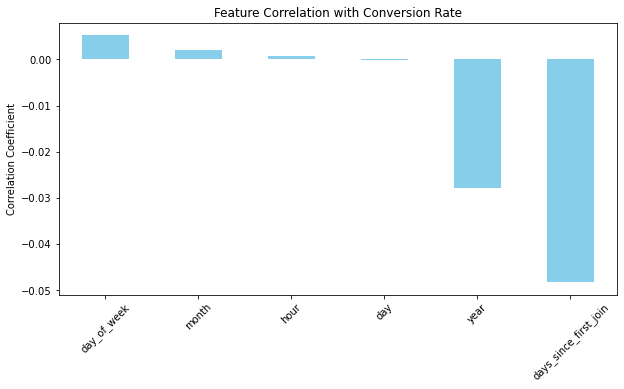

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation

date_col_encoded_df['conversion_rate'] = merged_df_with_journey['conversion_rate']
correlation_matrix_2 = date_col_encoded_df.corr()

target_corr = correlation_matrix_2["conversion_rate"].sort_values(ascending=False)
print(target_corr)

plt.figure(figsize=(10, 5))
target_corr.drop("conversion_rate").plot(kind='bar', color="skyblue")
plt.title("Feature Correlation with Conversion Rate")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.show()

In [84]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
date_col_encoded_df['is_holiday_season'] = label_encoder.fit_transform(merged_df_with_journey['is_holiday_season'])

new_correlation = date_col_encoded_df.corr()

# Check new correlation values with conversion_rate
print(new_correlation['conversion_rate'].sort_values(ascending=False))

conversion_rate          1.000000
is_weekend               0.007190
day_of_week              0.005265
is_holiday_season        0.003558
month                    0.002040
hour                     0.000641
day                     -0.000150
time_of_day             -0.003037
year                    -0.027869
days_since_first_join   -0.048292
Name: conversion_rate, dtype: float64


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert event sequences into tokenized format (split by " → ")
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(" → "), binary=True)

# Fit-transform the event_sequence column
event_sequence_encoded = vectorizer.fit_transform(merged_df_with_journey['event_sequence'])

# Convert to DataFrame
event_sequence_df = pd.DataFrame(event_sequence_encoded.toarray(), columns=vectorizer.get_feature_names_out())


# merged_df_with_journey.drop(columns=['event_sequence'], inplace=True)
event_sequence_df.head()

,add_promo,add_to_cart,booking,click,homepage,item_detail,promo_page,scroll,search
0,0,1,1,0,1,1,0,1,1
1,1,1,1,1,1,1,1,1,1
2,0,1,1,0,1,0,0,1,0
3,1,1,1,1,1,1,0,0,0
4,1,1,1,1,1,0,1,1,1


In [106]:
new_merged_df_with_journey = pd.concat([merged_df_with_journey, event_sequence_df], axis=1)

# new_merged_df_with_journey = new_merged_df_with_journey.drop(columns=['event_sequence'], inplace=True)
new_merged_df_with_journey.head()

,Unnamed: 0,session_id,event_id,booking_id,customer_id,traffic_source,event_time,created_at,first_join_date,home_country,...,is_holiday_season,add_promo,add_to_cart,booking,click,homepage,item_detail,promo_page,scroll,search
0,0,7d440441-e67a-4d36-b324-80ffd636d166,88aeaeb5-ec98-4859-852c-8abb483faf31,47c126bc-989d-4001-a153-a3fc5685e9b5,18770,MOBILE,2019-09-01 12:05:10.322763+00:00,2019-09-01 12:15:29.425431+00:00,2019-08-31 00:00:00+00:00,Indonesia,...,0,0,1,1,0,1,1,0,1,1
1,9,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,177faf86-4afe-4214-91f5-dde253b7984d,022def29-0956-483a-b27c-ae69263351ef,18770,MOBILE,2019-09-09 04:49:02.425431+00:00,2019-09-09 12:17:55.425431+00:00,2019-08-31 00:00:00+00:00,Indonesia,...,0,1,1,1,1,1,1,1,1,1
2,36,b2843a94-248f-429e-bd54-1a456b4ef4a7,c5cef5d0-f373-460b-8cd7-67122787d743,9c2cf094-76bb-4119-917d-d87d732da8fa,18770,MOBILE,2019-09-15 00:09:43.425431+00:00,2019-09-17 12:17:58.425431+00:00,2019-08-31 00:00:00+00:00,Indonesia,...,0,0,1,1,0,1,0,0,1,0
3,40,d9aaa8a8-5e60-4e1e-ab0a-bb9755a7a3e9,ab929a73-3c47-4870-a7e9-74a69a1c9688,32766f80-e889-4483-84f6-4da69e8fd8a8,18770,WEB,2019-09-23 20:17:49.425431+00:00,2019-09-25 12:30:19.425431+00:00,2019-08-31 00:00:00+00:00,Indonesia,...,0,1,1,1,1,1,1,0,0,0
4,49,98e66f53-f24f-4238-8c9c-34a0482e22d5,f0afb1f7-2938-49d8-af80-fd80351927bb,d2d99246-0eee-4d10-a902-7ef1b07d9c1f,18770,MOBILE,2019-10-02 11:23:23.425431+00:00,2019-10-03 12:34:39.425431+00:00,2019-08-31 00:00:00+00:00,Indonesia,...,0,1,1,1,1,1,0,1,1,1


In [107]:
new_merged_df_with_journey.drop(columns=['event_sequence'], inplace=True)


In [112]:
new_merged_df_with_journey.head()

,Unnamed: 0,session_id,event_id,booking_id,customer_id,traffic_source,event_time,created_at,first_join_date,home_country,...,is_holiday_season,add_promo,add_to_cart,booking,click,homepage,item_detail,promo_page,scroll,search
0,0,7d440441-e67a-4d36-b324-80ffd636d166,88aeaeb5-ec98-4859-852c-8abb483faf31,47c126bc-989d-4001-a153-a3fc5685e9b5,18770,MOBILE,2019-09-01 12:05:10.322763+00:00,2019-09-01 12:15:29.425431+00:00,2019-08-31 00:00:00+00:00,Indonesia,...,0,0,1,1,0,1,1,0,1,1
1,9,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,177faf86-4afe-4214-91f5-dde253b7984d,022def29-0956-483a-b27c-ae69263351ef,18770,MOBILE,2019-09-09 04:49:02.425431+00:00,2019-09-09 12:17:55.425431+00:00,2019-08-31 00:00:00+00:00,Indonesia,...,0,1,1,1,1,1,1,1,1,1
2,36,b2843a94-248f-429e-bd54-1a456b4ef4a7,c5cef5d0-f373-460b-8cd7-67122787d743,9c2cf094-76bb-4119-917d-d87d732da8fa,18770,MOBILE,2019-09-15 00:09:43.425431+00:00,2019-09-17 12:17:58.425431+00:00,2019-08-31 00:00:00+00:00,Indonesia,...,0,0,1,1,0,1,0,0,1,0
3,40,d9aaa8a8-5e60-4e1e-ab0a-bb9755a7a3e9,ab929a73-3c47-4870-a7e9-74a69a1c9688,32766f80-e889-4483-84f6-4da69e8fd8a8,18770,WEB,2019-09-23 20:17:49.425431+00:00,2019-09-25 12:30:19.425431+00:00,2019-08-31 00:00:00+00:00,Indonesia,...,0,1,1,1,1,1,1,0,0,0
4,49,98e66f53-f24f-4238-8c9c-34a0482e22d5,f0afb1f7-2938-49d8-af80-fd80351927bb,d2d99246-0eee-4d10-a902-7ef1b07d9c1f,18770,MOBILE,2019-10-02 11:23:23.425431+00:00,2019-10-03 12:34:39.425431+00:00,2019-08-31 00:00:00+00:00,Indonesia,...,0,1,1,1,1,1,0,1,1,1


In [ ]:
# #Approach 3: Integer Encoding + Word Embeddings (For Deep Learning)
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Initialize Tokenizer
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(merged_df_with_journey['event_sequence'])

# # Convert event sequences to integer sequences
# event_sequences_int = tokenizer.texts_to_sequences(merged_df_with_journey['event_sequence'])

# # Apply padding (ensuring equal sequence length)
# event_sequences_padded = pad_sequences(event_sequences_int, padding='post')

# # Convert to DataFrame and merge
# event_sequence_df = pd.DataFrame(event_sequences_padded)
# merged_df_with_journey = pd.concat([merged_df_with_journey, event_sequence_df], axis=1)

# # Drop original event sequence column (optional)
# merged_df_with_journey.drop(columns=['event_sequence'], inplace=True)

# merged_df_with_journey.head()

In [ ]:
#Approach 2: TF-IDF Vectorization (Weighted Encoding)
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split(" → "), use_idf=True)

# Fit-transform event sequences
tfidf_encoded = tfidf_vectorizer.fit_transform(merged_df_with_journey['event_sequence'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_encoded.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Merge with original DataFrame
weighted_encoding_merged_df_with_journey = pd.concat([merged_df_with_journey, tfidf_df], axis=1)

# # Drop original event sequence column (optional)
weighted_encoding_merged_df_with_journey.drop(columns=['event_sequence'], inplace=True)
weighted_encoding_merged_df_with_journey

,session_id,event_id,booking_id,customer_id,traffic_source,event_time,created_at,first_join_date,home_country,gender,...,conversion_rate,add_promo,add_to_cart,booking,click,homepage,item_detail,promo_page,scroll,search
0,7d440441-e67a-4d36-b324-80ffd636d166,88aeaeb5-ec98-4859-852c-8abb483faf31,47c126bc-989d-4001-a153-a3fc5685e9b5,18770,MOBILE,2019-09-01T12:05:10.322763Z,2019-09-01 12:15:29.425431+00:00,2019-08-31,Indonesia,F,...,0.111111,0.000000,0.180241,0.180241,0.000000,0.360483,0.812875,0.000000,0.254945,0.281630
1,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,177faf86-4afe-4214-91f5-dde253b7984d,022def29-0956-483a-b27c-ae69263351ef,18770,MOBILE,2019-09-09T04:49:02.425431Z,2019-09-09 12:17:55.425431+00:00,2019-08-31,Indonesia,F,...,0.037037,0.150471,0.623875,0.077984,0.296256,0.311938,0.234469,0.296542,0.441225,0.243704
2,b2843a94-248f-429e-bd54-1a456b4ef4a7,c5cef5d0-f373-460b-8cd7-67122787d743,9c2cf094-76bb-4119-917d-d87d732da8fa,18770,MOBILE,2019-09-15T00:09:43.425431Z,2019-09-17 12:17:58.425431+00:00,2019-08-31,Indonesia,F,...,0.250000,0.000000,0.447182,0.447182,0.000000,0.447182,0.000000,0.000000,0.632523,0.000000
3,d9aaa8a8-5e60-4e1e-ab0a-bb9755a7a3e9,ab929a73-3c47-4870-a7e9-74a69a1c9688,32766f80-e889-4483-84f6-4da69e8fd8a8,18770,WEB,2019-09-23T20:17:49.425431Z,2019-09-25 12:30:19.425431+00:00,2019-08-31,Indonesia,F,...,0.111111,0.398901,0.620213,0.206738,0.523586,0.206738,0.310791,0.000000,0.000000,0.000000
4,98e66f53-f24f-4238-8c9c-34a0482e22d5,f0afb1f7-2938-49d8-af80-fd80351927bb,d2d99246-0eee-4d10-a902-7ef1b07d9c1f,18770,MOBILE,2019-10-02T11:23:23.425431Z,2019-10-03 12:34:39.425431+00:00,2019-08-31,Indonesia,F,...,0.071429,0.245831,0.127406,0.127406,0.645339,0.254812,0.000000,0.484472,0.180212,0.398148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821842,f38416ce-51f2-46b0-a476-776d8fed1cb0,7201b838-9d41-429c-a5f7-da4b9b64ca6e,986fcb6b-d0ce-4b74-8818-dab4c33866f5,82032,WEB,2021-08-01T07:47:06.737783Z,2021-08-01 08:36:19.259139+00:00,2021-08-01,Indonesia,F,...,0.250000,0.000000,0.428689,0.428689,0.000000,0.428689,0.000000,0.000000,0.000000,0.669833
821843,c1ce86f6-858b-4009-af5b-f1483a28d020,74ae05ad-1c63-493f-88d3-cd225cb5ceb5,52c3fdbe-3d6d-4044-a609-2ea7d7e3e036,42455,WEB,2020-09-22T22:30:52.674560Z,2020-09-22 23:15:15.843895+00:00,2020-09-20,Indonesia,M,...,0.250000,0.000000,0.428689,0.428689,0.000000,0.428689,0.000000,0.000000,0.000000,0.669833
821844,f5c4bbe0-f977-45bb-af23-6ab524df7777,8eef30df-e285-4541-9d07-d628b408ac8a,a3024507-444d-4925-a0a2-e2991d7c789c,64875,MOBILE,2022-04-09T20:52:23.132472Z,2022-04-09 21:19:08.619449+00:00,2022-04-09,Indonesia,F,...,0.250000,0.000000,0.428689,0.428689,0.000000,0.428689,0.000000,0.000000,0.000000,0.669833
821845,ad1063b0-a6e5-40a9-aed6-d1b45741e571,0a71bea6-41d5-41fd-9254-f59d21239f0b,c7031615-9636-4ce8-a145-1568cbf4ce79,44381,MOBILE,2021-06-07T04:31:33.354381Z,2021-06-07 04:50:54.096245+00:00,2021-06-06,Indonesia,M,...,0.250000,0.000000,0.428689,0.428689,0.000000,0.428689,0.000000,0.000000,0.000000,0.669833


In [115]:
weighted_encoding_merged_df_with_journey.to_csv("weighted_encoding_merged_df.csv")